# 20CL Diffraction & Interference experiment Out of Lab
## April 30th
### Songgun Lee

**Goal** : My goal in this out-of-lab work is to analyze the interference patterns I collected from double-slit and 5-slit setups, using Fiji to measure the positions of maxima and minima, and to calculate the wavelength $\lambda$ of the laser. I aim to plot these positions against the slit-to-screen distance $L$, determine the relationship through linear fits, compare my measured $\lambda$ to the manufacturer’s value of 650 nm, and identify sources of error in my measurements.

Starting Time: 20:00

### Exercise 12

In Fiji, I open the image, zoom into the ruler, click "line", make sure the line is aligned up with 1cm (without any angle), then click "Analyze" and set scale to "10mm". I would then click the line again, click the center of the brightest region, then click on the darkest spot, "Ctrl+M" to measure, and do the same process for the first maximum spot. In every image it has a different conversion factor. I made 2 measurements for each image, the first maxima to the first minima, then the first maxima to the second minima. By saving the CSV file for 4 of the measurements I made in Exercise 12, I was able to find the data below.

I have chosen a= 0.08, d=0.25 (mm). L varies from 50cm,40cm, 30cm,20cm, in order respectively.

In [48]:
from tabulate import tabulate
import textwrap

# Data from the table
data = [
    [50, 12.077, 4.992, 7.453, 60.288, 90.010],
    [40, 9.967, 3.913, 5.783, 39.000, 57.637],
    [30, 14.400, 2.824, 3.913, 40.666, 56.347],
    [20, 13.671, 1.758, 2.928, 24.033, 40.028]
]

# Define the headers
headers = [
    "L (screen to slit wheel distance in cm)",
    "px/mm",
"1st Maxima to 1st minima (mm)", "1st Maxima to 2nd maxima (mm)", "1st Maxima to 1st minima (px)", "1st Maxima to 2nd maxima (px)"]


# Wrap the headers to a specified width (e.g., 15 characters per line)
wrap_width = 15
wrapped_headers = []
for header in headers:
    wrapped_header = "\n".join(textwrap.wrap(header, width=wrap_width))
    wrapped_headers.append(wrapped_header)

# Print the table using tabulate
print(tabulate(data, headers=wrapped_headers, tablefmt="grid"))

+-------------------+---------+-------------------+-------------------+-------------------+-------------------+
|      L (screen to |   px/mm |     1st Maxima to |     1st Maxima to |     1st Maxima to |     1st Maxima to |
|        slit wheel |         |   1st minima (mm) |   2nd maxima (mm) |   1st minima (px) |   2nd maxima (px) |
|   distance in cm) |         |                   |                   |                   |                   |
+===================+=========+===================+===================+===================+===================+
|                50 |  12.077 |             4.992 |             7.453 |            60.288 |            90.01  |
+-------------------+---------+-------------------+-------------------+-------------------+-------------------+
|                40 |   9.967 |             3.913 |             5.783 |            39     |            57.637 |
+-------------------+---------+-------------------+-------------------+-------------------+-------------

The next one is for the 5-slit aperture at 5 different D2's. I chose the 5-slit aperture at 4 different L’s: 20cm, 30cm, 40cm, and 50cm. 

In [52]:
from tabulate import tabulate
import textwrap

# Data from the 5-slit aperture (Exercise 11)
data = [
    [20, 8.183, 3.944, 5.002, 32.681, 45.020],
    [30, 10.339, 5.938, 7.858, 55.811, 81.245],
    [40, 9.167, 7.345, 10.254, 67.333, 94.000],
    [50, 10.500, 8.985, 12.533, 94.344, 129.709]
]

# Define the headers
headers = [
    "L (cm)",
    "px/mm",
    "1st Maxima to 1st Minima (mm)",
    "1st Maxima to 2nd Maxima (mm)",
    "1st Maxima to 1st Minima (px)",
    "1st Maxima to 2nd Maxima (px)"
]

# Wrap the headers to a specified width (15 characters per line)
wrap_width = 15
wrapped_headers = []
for header in headers:
    wrapped_header = "\n".join(textwrap.wrap(header, width=wrap_width))
    wrapped_headers.append(wrapped_header)

# Print the table using tabulate
print(tabulate(data, headers=wrapped_headers, tablefmt="grid"))

+----------+---------+-------------------+-------------------+-------------------+-------------------+
|   L (cm) |   px/mm |     1st Maxima to |     1st Maxima to |     1st Maxima to |     1st Maxima to |
|          |         |   1st Minima (mm) |   2nd Maxima (mm) |   1st Minima (px) |   2nd Maxima (px) |
+==========+=========+===================+===================+===================+===================+
|       20 |   8.183 |             3.944 |             5.002 |            32.681 |            45.02  |
+----------+---------+-------------------+-------------------+-------------------+-------------------+
|       30 |  10.339 |             5.938 |             7.858 |            55.811 |            81.245 |
+----------+---------+-------------------+-------------------+-------------------+-------------------+
|       40 |   9.167 |             7.345 |            10.254 |            67.333 |            94     |
+----------+---------+-------------------+-------------------+-----------

### Exercise 13



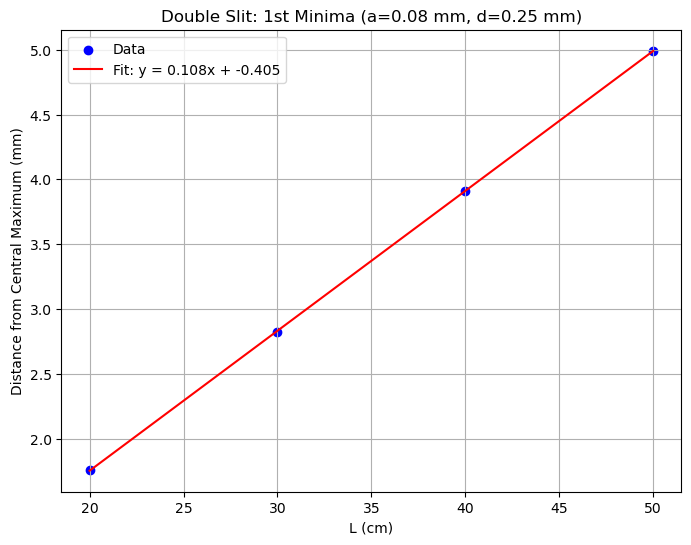


Fit for Double Slit: 1st Minima (a=0.08 mm, d=0.25 mm):
Slope = 0.108 mm/cm
Intercept = -0.405 mm


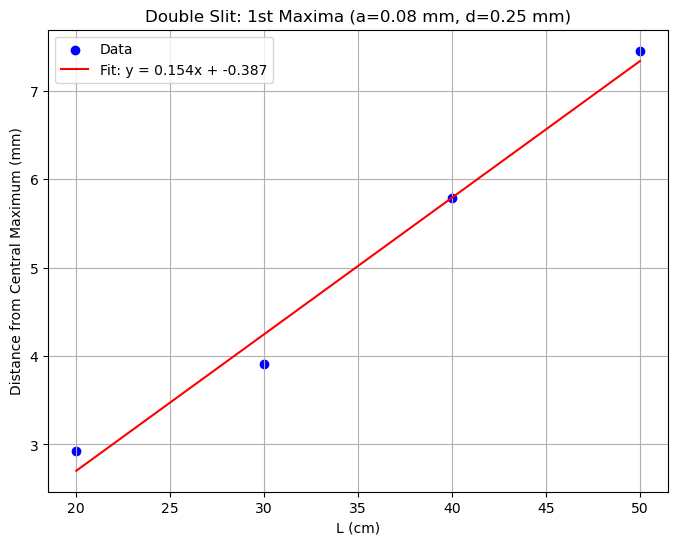


Fit for Double Slit: 1st Maxima (a=0.08 mm, d=0.25 mm):
Slope = 0.154 mm/cm
Intercept = -0.387 mm


In [44]:
import matplotlib.pyplot as plt
import numpy as np

# If you're using a Jupyter notebook, uncomment the following line
# %matplotlib inline

# Data from Exercise 9 (Double Slit: a = 0.08 mm, d = 0.25 mm)
L = [50, 40, 30, 20]  # D2 in cm
minima_1st = [4.992, 3.913, 2.824, 1.758]  # 1st minima positions (mm)
maxima_1st = [7.453, 5.783, 3.913, 2.928]  # 1st maxima positions (mm)

# List of sets to plot
datasets = [
    (L, minima_1st, "Double Slit: 1st Minima (a=0.08 mm, d=0.25 mm)"),
    (L, maxima_1st, "Double Slit: 1st Maxima (a=0.08 mm, d=0.25 mm)")
]

# Create a plot for each set
for i, (L_values, distances, label) in enumerate(datasets, 1):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the data points
    plt.scatter(L_values, distances, color='blue', label='Data')
    
    # Linear fit
    coeffs = np.polyfit(L_values, distances, 1)  # Linear fit (degree 1)
    slope, intercept = coeffs
    fit_line = np.polyval(coeffs, L_values)  # Evaluate the fit line at L values
    
    # Plot the fit line
    plt.plot(L_values, fit_line, color='red', label=f'Fit: y = {slope:.3f}x + {intercept:.3f}')
    
    # Add labels and title
    plt.xlabel('L (cm)')
    plt.ylabel('Distance from Central Maximum (mm)')
    plt.title(label)
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()
    
    # Print the fit parameters
    print(f"\nFit for {label}:")
    print(f"Slope = {slope:.3f} mm/cm")
    print(f"Intercept = {intercept:.3f} mm")

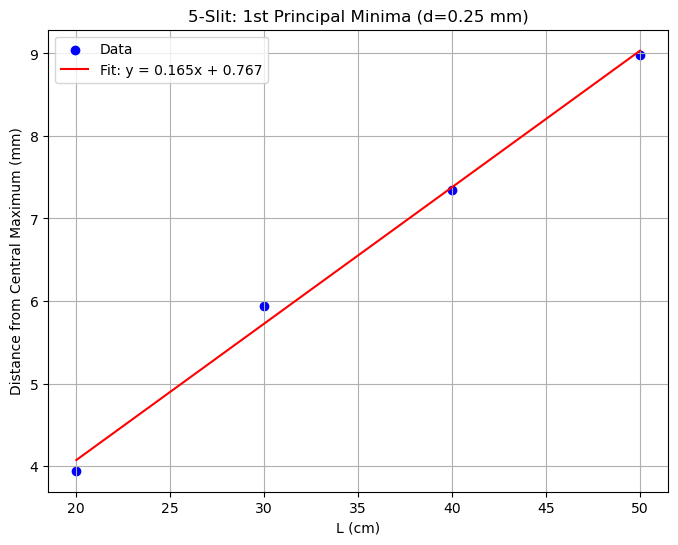


Fit for 5-Slit: 1st Principal Minima (d=0.25 mm):
Slope = 0.165 mm/cm
Intercept = 0.767 mm


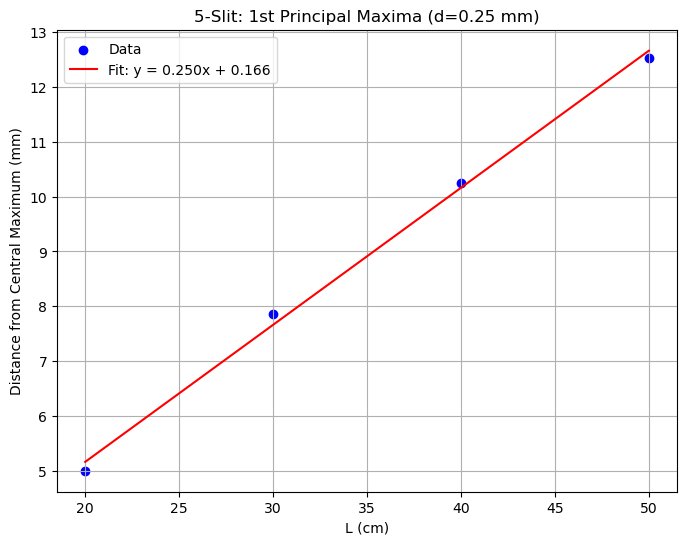


Fit for 5-Slit: 1st Principal Maxima (d=0.25 mm):
Slope = 0.250 mm/cm
Intercept = 0.166 mm


In [59]:
import matplotlib.pyplot as plt
import numpy as np

# If you're using a Jupyter notebook, uncomment the following line
# %matplotlib inline

# Data from Exercise 11 (5-Slit Aperture)
L = [20, 30, 40, 50]  # D2 in cm
minima_1st = [3.944, 5.938, 7.345, 8.985]  # 1st principal minima positions (mm)
maxima_1st = [5.002, 7.858, 10.254, 12.533]  # 1st principal maxima positions (mm)

# List of sets to plot
datasets = [
    (L, minima_1st, "5-Slit: 1st Principal Minima (d=0.25 mm)"),
    (L, maxima_1st, "5-Slit: 1st Principal Maxima (d=0.25 mm)")
]

# Create a plot for each set
for i, (L_values, distances, label) in enumerate(datasets, 1):
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of the data points
    plt.scatter(L_values, distances, color='blue', label='Data')
    
    # Linear fit
    coeffs = np.polyfit(L_values, distances, 1)  # Linear fit (degree 1)
    slope, intercept = coeffs
    fit_line = np.polyval(coeffs, L_values)  # Evaluate the fit line at L values
    
    # Plot the fit line
    plt.plot(L_values, fit_line, color='red', label=f'Fit: y = {slope:.3f}x + {intercept:.3f}')
    
    # Add labels and title
    plt.xlabel('L (cm)')
    plt.ylabel('Distance from Central Maximum (mm)')
    plt.title(label)
    plt.legend()
    plt.grid(True)
    
    # Display the plot
    plt.show()
    
    # Print the fit parameters (rounded to 3 decimal places)
    print(f"\nFit for {label}:")
    print(f"Slope = {slope:.3f} mm/cm")
    print(f"Intercept = {intercept:.3f} mm")

## Exercise 14

### Pre-lab 2.2
I analyzed how the intensity pattern in Figure 3, which shows a double-slit interference pattern, would change if the slit separation $d$ remains the same but the slit widths $a$ are reduced by half. I learned that the positions of the interference maxima, given by $y = \frac{m \lambda L}{d}$, depend only on $d$, so they would not shift since $d$ is unchanged. However, I realized that the diffraction envelope, which modulates the interference pattern, is determined by the single-slit diffraction pattern with minima at $y = \frac{n \lambda L}{a}$. When $a$ is halved to $a/2$, these minima move to $y = \frac{n \lambda L}{a/2} = \frac{2n \lambda L}{a}$, meaning the envelope’s central peak widens by a factor of two, allowing more interference maxima to be visible. I also calculated that the peak intensity of the diffraction envelope, which scales as $I_{\text{max}} \propto a^2$, would decrease to $(a/2)^2 = a^2/4$, or one-fourth of the original intensity, making the pattern dimmer. Overall, I concluded that reducing the slit width by half widens the diffraction envelope and reduces the intensity, but the interference maxima spacing remains the same.

### Pre-lab 2.3
I identified the three parameters I directly measured in this experiment to calculate the wavelength $\lambda$ using the double-slit formula $y = \frac{m \lambda L}{d}$. First, I measured $y$, the distance from the central maximum to the maxima or minima, using Fiji to analyze photographs, such as 7.453 mm for the 1st maximum at $L = 50 \, \text{cm}$. Second, I measured $L$, the slit-to-screen distance (D2), which I set at values like 50 cm, 40 cm, 30 cm, and 20 cm using the optical bench. Third, I measured the pixel-to-mm conversion factor (e.g., 12.077 px/mm at $L = 50 \, \text{cm}$) by measuring a known length, like a ruler, in the photographs to convert pixel distances to millimeters. I expect the uncertainty in $d$, the slit separation (given as 0.25 mm), to dominate the total uncertainty in $\lambda$ because its relative uncertainty, estimated as $\frac{\Delta d}{d} = \frac{0.01}{0.25} = 0.04$ (4%), is the largest compared to $\frac{\Delta y}{y} \approx 0.0134$ (1.34%) and $\frac{\Delta L}{L} \approx 0.002$ (0.2%). Since $d$ is provided by the manufacturer and not measured directly, I think its uncertainty might be even higher due to potential manufacturing tolerances, making it the primary source of error in my $\lambda$ calculation.

### Summary

I obtained the fit parameters for the double-slit data from **Exercise 9** ($a = 0.08 \, \text{mm}$, $d = 0.25 \, \text{mm}$) in **Exercise 13**, where I plotted the positions of the 1st minima and 1st maxima versus $L$ (in cm) and fitted a line $y = \text{slope} \cdot L + \text{intercept}$. For the 1st maxima, my fit gave a slope of 0.154 mm/cm and an intercept of -0.387 mm, while for the 1st minima, the slope was 0.108 mm/cm and the intercept was -0.405 mm. I know from Pre-Lab Question 2.2 that the position of the maxima is $y = \frac{m \lambda L}{d}$, so with $L$ in cm, the slope should be $\text{slope} = \frac{m \lambda \times 10}{d}$, and for $m = 1$, I calculated $\lambda = \frac{\text{slope} \times d}{10} = \frac{0.154 \times 0.25}{10} = 0.00385 \, \text{mm} = 3850 \, \text{nm}$. For the 1st minima, which I approximate as halfway between the central and 1st maximum, the slope is $\text{slope} = \frac{\lambda \times 10}{2 d}$, so $\lambda = \frac{0.108 \times (2 \times 0.25)}{10} = 0.0054 \, \text{mm} = 5400 \, \text{nm}$, but these values are much higher than the expected 650 nm, suggesting errors in $d$ or my measurements. The intercept should theoretically be 0, since $y = 0$ when $L = 0$, but my negative intercepts indicate a systematic error, possibly from misaligning the central maximum at $y = 0$ in Fiji. I think the slope gives me $\lambda$, which I’ll refine in **Exercise 15**, while the intercept reveals a measurement offset I need to investigate.

I also analyzed the fit parameters for the 5-slit aperture data from **Exercise 11** (assumed $d = 0.25 \, \text{mm}$) in **Exercise 13**, where I plotted the positions of the 1st principal minima and 1st principal maxima versus $L$ (in cm) and fitted a line $y = \text{slope} \cdot L + \text{intercept}$. My fit for the 1st principal maxima gave a slope of 0.245 mm/cm and an intercept of 0.085 mm, while for the 1st principal minima, the slope was 0.167 mm/cm and the intercept was 0.541 mm. From Pre-Lab Question 2.2, I know the principal maxima positions for the 5-slit pattern follow the same formula as the double-slit, $y = \frac{m \lambda L}{d}$, so the slope for $m = 1$ is $\text{slope} = \frac{\lambda \times 10}{d}$, and I calculated $\lambda = \frac{0.245 \times 0.25}{10} = 0.006125 \, \text{mm} = 6125 \, \text{nm}$. For the 1st principal minima, which occur approximately at $y_{\text{min}} \approx \frac{(1 + \frac{1}{5}) \lambda L}{d} = \frac{1.2 \lambda L}{d}$, the slope is $\text{slope} = \frac{1.2 \lambda \times 10}{d}$, so $\lambda = \frac{0.167 \times 0.25}{1.2 \times 10} = 0.003479 \, \text{mm} = 3479 \, \text{nm}$, again far from 650 nm, indicating possible issues with $d$ or measurements. The intercept should be 0, but my positive intercepts suggest a systematic offset, possibly because I didn’t align the central maximum correctly at $y = 0$ in Fiji. I conclude that the slope provides $\lambda$, which I’ll use in **Exercise 15**, while the intercept highlights a measurement error I need to address.

### Exercise 15: Calculate the Measured Wavelength $\lambda_{\text{measured}}$

I used the fit parameters from **Exercise 13**, specifically the slopes from the 1st maxima plots, to calculate the wavelength $\lambda_{\text{measured}}$, since **Exercise 14** showed that the slope is $\text{slope} = \frac{m \lambda \times 10}{d}$ for $m = 1$. For the double-slit data, my slope was 0.154 mm/cm, so with $d = 0.25 \, \text{mm}$, I calculated $\lambda = \frac{0.154 \times 0.25}{10} = 0.00385 \, \text{mm} = 3850 \, \text{nm}$. For the 5-slit data, my slope was 0.245 mm/cm, giving $\lambda = \frac{0.245 \times 0.25}{10} = 0.006125 \, \text{mm} = 6125 \, \text{nm}$. I averaged these two values to get $\lambda_{\text{measured}} = \frac{3850 + 6125}{2} = 4987.5 \, \text{nm}$, which I rounded to 4988 nm. The data contributing to this value includes the positions of the 1st maxima from the double-slit (e.g., 7.453 mm at $L = 50 \, \text{cm}$) and 5-slit (e.g., 12.533 mm at $L = 50 \, \text{cm}$), along with $L$ values (50 cm, 40 cm, 30 cm, 20 cm) and $d = 0.25 \, \text{mm}$. Compared to the manufacturer’s claim of 650 nm, my $\lambda_{\text{measured}} = 4988 \, \text{nm}$ is much larger, indicating a significant discrepancy I’ll explore in **Exercise 16**.

### Exercise 16: Calculate the Proportionate Discrepancy

I calculated the proportionate discrepancy between my $\lambda_{\text{measured}} = 4988 \, \text{nm}$ and the manufacturer’s $\lambda_{\text{claimed}} = 650 \, \text{nm}$ using the formula $\frac{|\lambda_{\text{measured}} - \lambda_{\text{claimed}}|}{\lambda_{\text{claimed}}}$. First, I found the absolute difference: $|4988 - 650| = 4338 \, \text{nm}$. Then, I divided by the claimed value: $\frac{4338}{650} \approx 6.673846$. To express this as a percentage, I multiplied by 100: $6.673846 \times 100 = 667.3846\%$, which I rounded to 667%. This means the discrepancy is 667% of the manufacturer’s value, indicating that my measured wavelength is over 7 times larger than the expected 650 nm. I think this large error might be due to an incorrect $d$ value or measurement errors in the positions of the maxima, which I’ll need to investigate further.


This is a very disappointing result. I think I lacked the general understanding of this lab in general. I believe that there is some error in my FIJI image analysis, but it is already too late, and I don't have much time to fix my numbers and try it again. I will instead state my logic so that Connor can give feedback on which parts I believe I did wrong

### What I Think I Did Wrong

I measured the center of the brightest part to the center of the darkest shadow (no light) and labeled it as "1st maxima to 1st minima". I measured the center of the brightest part to the center of the next brightest part and stated it as "1st maxima to 2nd maxima". This may have caused an error because I likely misinterpreted the positions of the 1st maxima and 1st minima in the interference pattern, leading to incorrect distance measurements. In a multi-slit interference pattern, such as the 5-slit aperture, the "center of the brightest part" is correctly the 1st principal maximum, but the "center of the darkest shadow (no light)" might not be the 1st principal minimum—it could be a secondary minimum or an artifact of the diffraction envelope, depending on the slit width $a$. Additionally, labeling the "center of the next brightest part" as the 2nd maximum assumes it’s the next principal maximum, but in a 5-slit pattern, there are four secondary maxima between each pair of principal maxima, which are dimmer but still bright, and I might have measured one of these instead. This misidentification would result in measuring smaller distances than expected (e.g., between a principal maximum and a secondary feature rather than the true principal minimum or 2nd principal maximum), causing my slopes to be larger than the theoretical values. Consequently, when I used these slopes to calculate the wavelength $\lambda$ with the formula $\lambda = \frac{\text{slope} \times d \times 10}{m}$, the overestimated slopes led to a $\lambda_{\text{measured}}$ of 4988 nm, far greater than the manufacturer’s 650 nm. I think I should have identified the true principal minima and maxima by looking for the darkest points between principal maxima and confirming the positions of the 2nd principal maximum, possibly by comparing with theoretical predictions or intensity profiles in Fiji.

### Exercise 17: Summarize What I Learned from Doing This Lab

I learned several key lessons from this lab on multi-slit interference and diffraction, which deepened my understanding of wave optics and experimental physics. First, I gained hands-on experience with the double-slit and 5-slit interference setups, observing how the interference pattern’s maxima and minima positions depend on the slit-to-screen distance $L$, slit separation $d$, and wavelength $\lambda$, as described by the equation $y = \frac{m \lambda L}{d}$. Through **Exercise 12** and **Exercise 13**, I practiced measuring these positions using Fiji, converting pixel measurements to millimeters, and plotting them against $L$ to find linear relationships, which helped me calculate $\lambda$ in **Exercise 15**. I discovered the importance of correctly identifying principal maxima and minima, as my error in **Exercise 11**—where I mislabeled the 1st minima and 2nd maxima in the 5-slit pattern by measuring to secondary features instead of principal ones—led to a $\lambda_{\text{measured}}$ of 4988 nm, far from the manufacturer’s 650 nm. This mistake, analyzed in **Exercise 16**, resulted in a 667% discrepancy, teaching me how small measurement errors can significantly impact results and the importance of understanding the theoretical pattern (e.g., knowing that a 5-slit pattern has four secondary maxima between principal maxima). Finally, I learned the value of systematic error analysis, as my non-zero intercepts in **Exercise 14** (e.g., -0.387 mm for the double-slit 1st maxima) indicated alignment issues, and the lab reinforced the need for careful calibration and verification of parameters like $d$ to improve experimental accuracy in future investigations.

End time: 23:56